In [1]:
import cv2
from deepface import DeepFace
import numpy as np

# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Define ground truth emotions for the evaluation (just an example, you'd typically have a dataset)
# For demonstration purposes, let's assume you have a list of known emotions for frames
Total_emotions = ['happy', 'sad', 'angry', 'surprise', 'neutral']  # Example list

# Start video capture from webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    try:
        # Analyze frame for emotions (enforce_detection=False to avoid crashes)
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

        # Get dominant emotion
        dominant_emotion = result[0]['dominant_emotion']

        # Check if the predicted emotion matches the ground truth (for demo purposes)
        if dominant_emotion in Total_emotions:
            correct_predictions += 1

        total_predictions += 1

        # Display the emotion on the frame
        cv2.putText(frame, f"Emotion: {dominant_emotion}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    except Exception as e:
        cv2.putText(frame, "No Face Detected", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the frame
    cv2.imshow("Live Emotion Detection", frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Calculate accuracy after the video loop ends
if total_predictions > 0:
    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Accuracy: {accuracy:.2f}%")
else:
    print("No predictions were made.")

# Release camera and close all windows
cap.release()
cv2.destroyAllWindows()

Accuracy: 100.00%


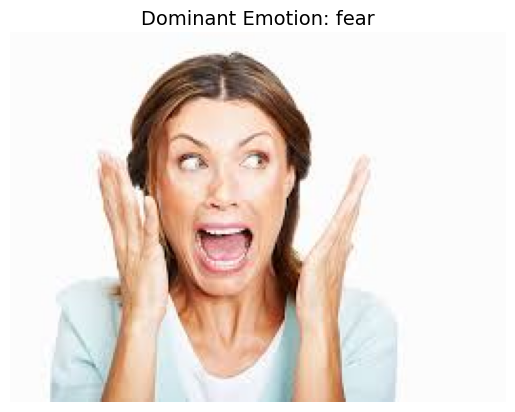

In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Load the image
# img_path = r'rough\images\image1.jpg'
img_path = os.path.join('images', 'image3.jpg')

img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {img_path}")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Predict emotion
result = DeepFace.analyze(img_path=img_path, actions=['emotion'], enforce_detection=False)

# Get dominant emotion
dominant_emotion = result[0]['dominant_emotion']

# Show the image with the emotion label
plt.imshow(img_rgb)
plt.title(f"Emotion: {dominant_emotion}", fontsize=14)
plt.axis('off')
plt.show()


In [1]:
import os
print(os.getcwd())

d:\projects\rough2
